In [1]:
import pandas as pd
import os
from pycaret.regression import *
from sklearn.model_selection import train_test_split
import datetime
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
path=r"C:\Users\py22715\OneDrive - University of Bristol\Documents\Python Scripts"

df=pd.read_csv(os.path.join(path,"Violation_stats.csv"))

#creating Year Wise Dataframes for each viiolation category
years=[]
for i in  df["year"]:
    k=i.split('-')
    years.append(datetime.datetime(int(k[0]),int(k[1]),1))
df_homo=pd.DataFrame()
df_homo["year"]=years
df_homo["values"]=df["homophobia"]

df_incivility=pd.DataFrame()
df_incivility["year"]=years
df_incivility["values"]=df["incivility"]


df_harm=pd.DataFrame()
df_harm["year"]=years
df_harm["values"]=df["self_harm"]


df_racial=pd.DataFrame()
df_racial["year"]=years
df_racial["values"]=df["racial_slur"]

df_harassment=pd.DataFrame()
df_harassment["year"]=years
df_harassment["values"]=df["harrassment"]

def timeSeriesPlot(df,target):
    train,test=train_test_split(df,train_size=0.5)
    s = setup(data = train, test_data = test, target = target, fold_strategy = 'timeseries', fold = 3, session_id = 123)
    best = compare_models(sort = 'RMSE')
    predictions = predict_model(best, data=df)
    predictions['Date'] = pd.date_range(start='2006-03-01', end = '2013-01-01', freq = '3M')
    return predictions

racial_preds=timeSeriesPlot(df_racial, "values")
harm_preds=timeSeriesPlot(df_harm, "values")
harass_preds=timeSeriesPlot(df_harassment, "values")
incivil_preds=timeSeriesPlot(df_incivility, "values")
homo_preds=timeSeriesPlot(df_homo, "values")

,Description,Value
0,Session id,123
1,Target,values
2,Target type,Regression
3,Original data shape,"(28, 2)"
4,Transformed data shape,"(28, 4)"
5,Transformed train set shape,"(14, 4)"
6,Transformed test set shape,"(14, 4)"
7,Date features,1
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,50.0789,8139.3098,72.8781,0.0748,2.1027,0.5632,0.1500
en,Elastic Net,55.6953,7572.5131,73.7118,-0.0163,2.3872,1.5883,1.0733
ridge,Ridge Regression,56.6195,7547.1610,73.8367,-0.0270,2.4636,1.4526,1.2900
lasso,Lasso Regression,56.8465,7562.9017,74.0229,-0.0356,2.4759,1.4673,1.0867
llar,Lasso Least Angle Regression,56.8465,7562.9023,74.0229,-0.0356,2.4759,1.4673,1.0567
lr,Linear Regression,57.1991,7563.5397,74.1248,-0.0415,2.5016,1.4174,1.6767
lar,Least Angle Regression,57.1991,7563.5397,74.1248,-0.0415,2.5016,1.4174,1.0833
knn,K Neighbors Regressor,53.6000,7754.4711,75.0684,-0.0718,2.2069,0.9921,0.0500
br,Bayesian Ridge,55.8399,7752.5622,75.1062,-0.0682,2.3209,2.0673,0.0667
rf,Random Forest Regressor,54.1756,7982.9254,76.0788,-0.0923,2.1546,0.6315,0.1600


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,18.1139,1281.6370,35.8000,0.7677,0.8154,0.4512


,Description,Value
0,Session id,123
1,Target,values
2,Target type,Regression
3,Original data shape,"(28, 2)"
4,Transformed data shape,"(28, 4)"
5,Transformed train set shape,"(14, 4)"
6,Transformed test set shape,"(14, 4)"
7,Date features,1
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,21.7872,862.1103,28.5711,-1136.8968,1.5994,13.8023,0.0700
par,Passive Aggressive Regressor,24.8763,2207.0623,31.6640,-0.9432,1.9800,0.9624,0.0333
rf,Random Forest Regressor,28.9711,1212.0235,33.1695,-2097.7896,1.9504,15.0570,0.1700
dt,Decision Tree Regressor,25.4444,1249.0000,34.6117,-2606.2034,1.5995,23.0992,0.0300
ada,AdaBoost Regressor,25.7778,1250.0000,34.6371,-2606.2158,1.6636,23.0715,0.0467
et,Extra Trees Regressor,28.7278,1580.4904,36.3500,-865.2583,1.6090,11.4265,0.1533
huber,Huber Regressor,33.8349,1972.3007,37.8126,-757.7930,2.4719,8.4221,0.0367
dummy,Dummy Regressor,35.5376,1937.0142,39.5748,-1084.2854,2.5019,9.3527,0.0400
lightgbm,Light Gradient Boosting Machine,35.5376,1937.0142,39.5748,-1084.2854,2.5019,9.3527,0.1200
br,Bayesian Ridge,35.5085,1943.4169,39.7031,-1084.5878,2.5059,9.3354,0.0333


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,9.7267,932.4924,30.5367,0.6883,0.9428,1.3555


,Description,Value
0,Session id,123
1,Target,values
2,Target type,Regression
3,Original data shape,"(28, 2)"
4,Transformed data shape,"(28, 4)"
5,Transformed train set shape,"(14, 4)"
6,Transformed test set shape,"(14, 4)"
7,Date features,1
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,887.5996,1376001.1359,1081.9478,-15.0614,3.6293,40.0710,0.0733
dt,Decision Tree Regressor,966.8889,1566866.8889,1220.9863,-40.4875,3.6576,40.6522,0.0367
ada,AdaBoost Regressor,985.5556,1570730.8889,1222.9528,-40.5631,3.2130,48.9969,0.0700
rf,Random Forest Regressor,1169.4778,1988626.2586,1342.2177,-37.1763,3.5815,143.3294,0.1667
et,Extra Trees Regressor,1145.1611,2628951.7852,1403.5691,-17.0715,3.2477,41.1911,0.1533
huber,Huber Regressor,1272.5698,2758237.0622,1427.6408,-23.2527,3.9548,101.4770,0.0400
omp,Orthogonal Matching Pursuit,1329.4808,2903097.0542,1491.0752,-22.4301,3.8582,166.7001,0.0367
par,Passive Aggressive Regressor,1347.8917,3829261.8544,1557.8155,-12.8666,4.1289,135.2382,0.0400
br,Bayesian Ridge,1562.2806,3297889.8377,1696.6670,-57.7533,4.2220,252.0758,0.0367
lightgbm,Light Gradient Boosting Machine,1590.1505,3497088.6350,1715.6765,-56.4621,4.2171,266.1964,0.0733


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,209.1660,149856.5155,387.1131,0.9230,1.6836,2.2275


,Description,Value
0,Session id,123
1,Target,values
2,Target type,Regression
3,Original data shape,"(28, 2)"
4,Transformed data shape,"(28, 4)"
5,Transformed train set shape,"(14, 4)"
6,Transformed test set shape,"(14, 4)"
7,Date features,1
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,796.4641,767265.6666,865.5464,-53.0242,3.8694,122.1609,0.0467
rf,Random Forest Regressor,855.2922,1943362.5402,1149.9774,-149.2371,3.4898,49.6364,0.1733
et,Extra Trees Regressor,799.4489,2952921.3400,1207.5918,-204.5966,2.8754,9.4158,0.1600
knn,K Neighbors Regressor,1061.5111,1892119.2178,1215.7723,-302.4768,3.9907,180.1926,0.0500
gbr,Gradient Boosting Regressor,883.9952,3072581.7094,1301.0337,-205.9835,3.0006,10.4141,0.0733
en,Elastic Net,1066.0215,2053730.1878,1311.2723,-203.5601,3.9009,165.5205,0.0400
dummy,Dummy Regressor,1291.2043,1910107.1218,1322.5008,-286.0427,4.3165,267.5599,0.0400
lightgbm,Light Gradient Boosting Machine,1291.2043,1910107.1218,1322.5008,-286.0427,4.3165,267.5599,0.0467
dt,Decision Tree Regressor,931.2222,3110661.4444,1372.2243,-213.8077,3.4337,7.5083,0.0433
ada,AdaBoost Regressor,943.4444,3112409.2222,1372.3044,-213.9720,3.1281,19.3842,0.0733


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,1324.4417,4406445.6369,2099.1536,-0.3619,3.2662,27.9157


,Description,Value
0,Session id,123
1,Target,values
2,Target type,Regression
3,Original data shape,"(28, 2)"
4,Transformed data shape,"(28, 4)"
5,Transformed train set shape,"(14, 4)"
6,Transformed test set shape,"(14, 4)"
7,Date features,1
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,42.1662,4792.6950,60.7388,-19.5657,1.1464,3.0529,0.0767
dt,Decision Tree Regressor,46.0000,5242.0000,67.5837,-100.0743,1.2469,5.6168,0.0467
rf,Random Forest Regressor,60.2678,6796.6432,72.0075,-60.3639,2.3848,3.5967,0.1700
ada,AdaBoost Regressor,49.5926,5735.3457,72.5051,-102.3845,1.4620,5.8892,0.0600
et,Extra Trees Regressor,55.5822,9675.1119,74.3692,-8.1095,1.1753,2.2134,0.1567
omp,Orthogonal Matching Pursuit,73.6924,11005.3099,85.4361,-26.0056,2.9388,2.0406,0.0400
huber,Huber Regressor,73.7571,14052.4197,89.6336,-23.6697,3.0149,2.1957,0.0467
br,Bayesian Ridge,84.1345,12222.8867,94.6931,-76.4517,3.1632,2.6111,0.0433
lightgbm,Light Gradient Boosting Machine,84.8492,12710.6114,95.6131,-76.1287,3.1494,2.7412,0.0467
dummy,Dummy Regressor,84.8492,12710.6114,95.6131,-76.1287,3.1494,2.7412,0.0433


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,18.8481,1498.1553,38.7060,0.7671,1.3829,1.4371


<Axes: title={'center': 'Racial Slur Analysis'}, xlabel='Years', ylabel='Incidents'>

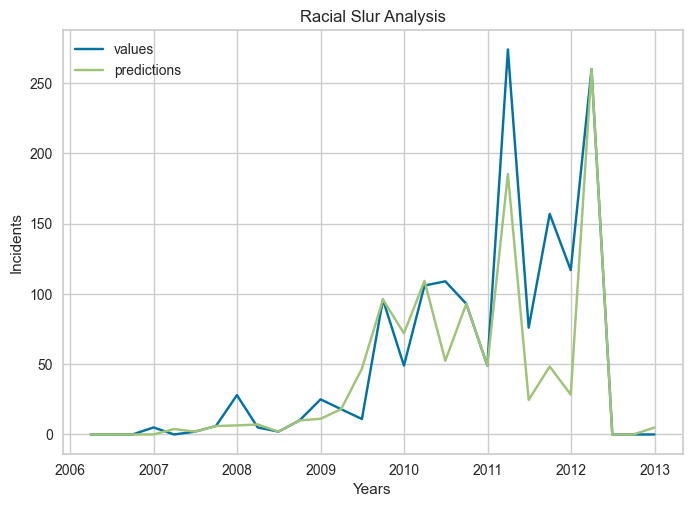

In [2]:
plt.title("Racial Slur Analysis")
plt.xlabel("Years")
plt.ylabel("Incidents")
sns.lineplot(x=racial_preds["Date"],y=racial_preds["values"],label='values')
sns.lineplot(x=racial_preds["Date"],y=racial_preds["prediction_label"],label='predictions')

<Axes: title={'center': 'Self Harm Analysis'}, xlabel='Years', ylabel='Incidents'>

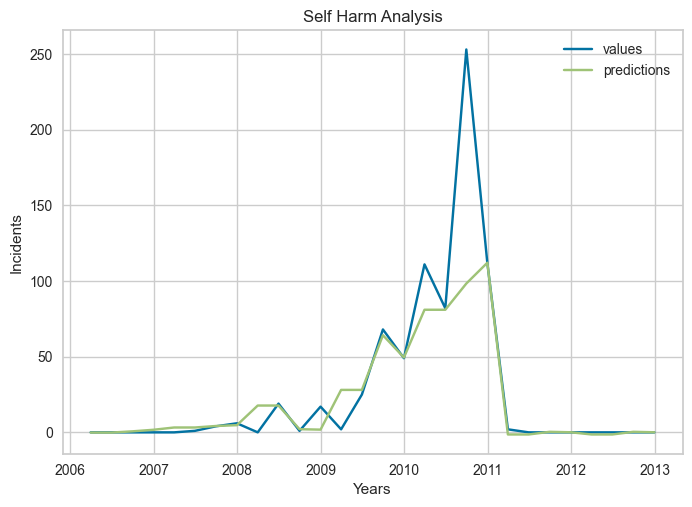

In [3]:
plt.title("Self Harm Analysis")
plt.xlabel("Years")
plt.ylabel("Incidents")
sns.lineplot(x=harm_preds["Date"],y=harm_preds["values"],label='values')
sns.lineplot(x=harm_preds["Date"],y=harm_preds["prediction_label"],label='predictions')


<Axes: title={'center': 'Harrassment Analysis'}, xlabel='Years', ylabel='Incidents'>

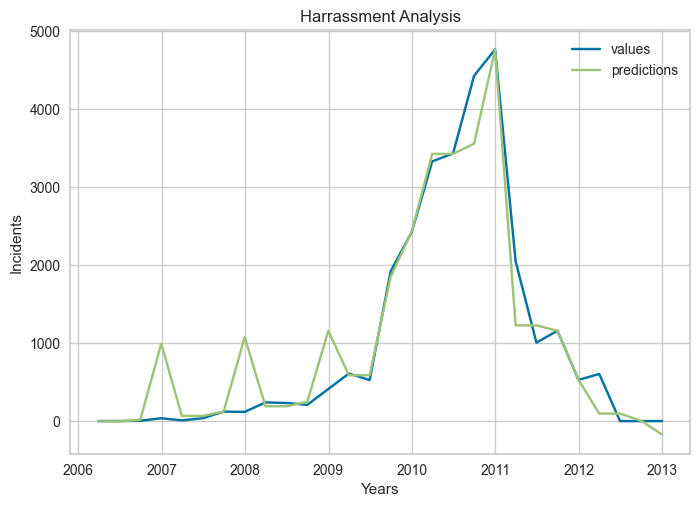

In [4]:
plt.title("Harrassment Analysis")
plt.xlabel("Years")
plt.ylabel("Incidents")
sns.lineplot(x=harass_preds["Date"],y=harass_preds["values"],label='values')
sns.lineplot(x=harass_preds["Date"],y=harass_preds["prediction_label"],label='predictions')

<Axes: title={'center': 'Incivility Analysis'}, xlabel='Years', ylabel='Incidents'>

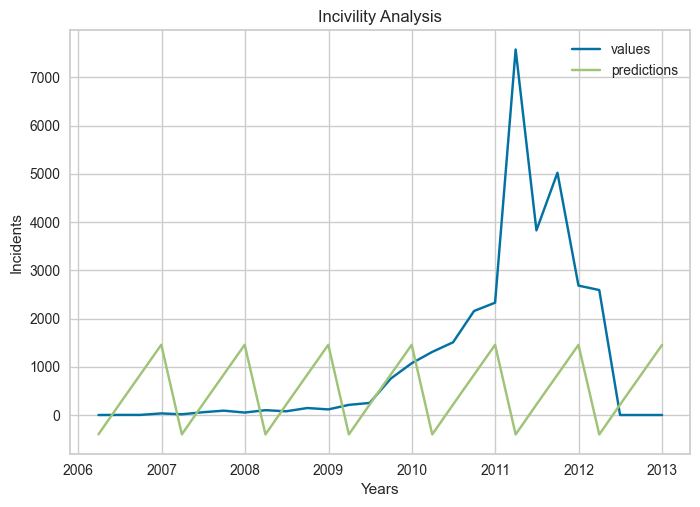

In [5]:
plt.title("Incivility Analysis")
plt.xlabel("Years")
plt.ylabel("Incidents")
sns.lineplot(x=incivil_preds["Date"],y=incivil_preds["values"],label='values')
sns.lineplot(x=incivil_preds["Date"],y=incivil_preds["prediction_label"],label='predictions')

<Axes: title={'center': 'Homophobia Analysis'}, xlabel='Years', ylabel='Incidents'>

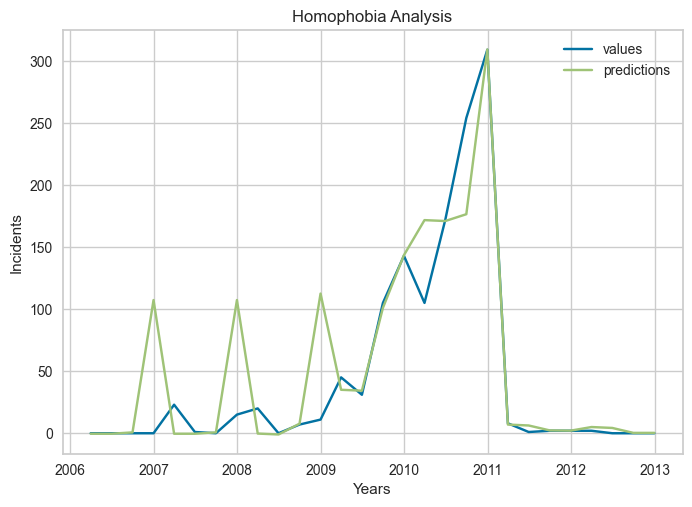

In [6]:
plt.title("Homophobia Analysis")
plt.xlabel("Years")
plt.ylabel("Incidents")
sns.lineplot(x=homo_preds["Date"],y=homo_preds["values"],label='values')
sns.lineplot(x=homo_preds["Date"],y=homo_preds["prediction_label"],label='predictions')